In [18]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import re


In [31]:
#=====Input==========

#Experiment Type: 'NAM' or 'Foam'
test_id = 'NAM'
test_con = 'Angled' #test orientation (Planar or Angled)

#For NAM 
if test_id =='NAM':
    test_type = '\\NAM3 Angled'
    test_vel = '82'
    
    #Folder creation
    sample_type = '\Angled'
    
#For Foam
elif test_id == 'Foam':
    test_type = '\\Rohacell Prelim'
    test_vel = 'ALL'
    
    #Folder creation
    sample_type = '\Rohacell'

#Graph Colour Scheme: 'rk' for red-black or 'rgb' for randomised spectrum

plot_colour = 'rk'

#=======================

#Access directory
if test_id=='NAM':
    dir = r'F:\My Drive\Oxford 2022-23\NAM 3-4\Figures\NAM3'
    path = dir + sample_type
    #Save directory
    save_dir = os.path.join(path,'Figures')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    if test_con == 'Angled':
        savename1 = save_dir+test_type+'_X'+'.png'
        savename2 = save_dir+test_type+'_Y'+'.png'
    elif test_con == 'Planar':
        savename = save_dir + test_type + '.png'
elif test_id=='Foam':
    dir = r'F:\My Drive\Oxford 2022-23\DIHPB_Foam\Figures'
    path = dir + sample_type
    #Save directory
    save_dir = os.path.join(path,'Figures')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    savename = save_dir + test_type + '.png'

In [32]:
if test_con == 'Planar':
    #Search for all excel files
    csv_files = Path(path).glob('*.csv')
    xlsx_files = Path(path).glob('*.xlsx')
    all_files = list(csv_files) + list(xlsx_files)
    all_files=sorted(all_files)
    experiments = {} #dict
    
    #Combine then into a dataframe then into a nested dictionary 
    
    for filename in all_files:
        filename_str = str(filename)
        #For csv files
        if filename_str.endswith('.csv'):
            df = pd.read_csv(filename, usecols = ['Strain','Stress'], index_col = None, header=0) #we only want strain and stress columns
            df = df.dropna()
            test_name = os.path.basename(filename)
            test_name = os.path.splitext(test_name)[0]
            strain = df['Strain'].values
            stress = df['Stress'].values
            experiments.update({test_name:{"strain": strain,"stress":stress}}) #nested
        #for xlsx files    
        elif filename_str.endswith(('.xls','xlsx')):
            df = pd.read_excel(filename, usecols = ['Strain','Stress'], index_col = None, header=0) #we only want strain and stress columns
            df = df.dropna()
            test_name = os.path.basename(filename)
            test_name = os.path.splitext(test_name)[0]
            strain = df['Strain'].values
            stress = df['Stress'].values
            experiments.update({test_name:{"strain": strain,"stress":stress}}) #nested
elif test_con == 'Angled':
    #Search for all excel files
    csv_files = Path(path).glob('*.csv')
    xlsx_files = Path(path).glob('*.xlsx')
    all_files = list(csv_files) + list(xlsx_files)
    all_files=sorted(all_files)
    experiments = {} #dict
    
    #Combine then into a dataframe then into a nested dictionary 
    
    for filename in all_files:
        filename_str = str(filename)
        #For csv files
        if filename_str.endswith('.csv'):
            df = pd.read_csv(filename, usecols = ['Axial Time','Axial Strain','Bending Time','Bending Strain'], index_col = None, header=0) #we only want strain and stress columns
            df = df.dropna()
            test_name = os.path.basename(filename)
            test_name = os.path.splitext(test_name)[0]
            time_x = df['Axial Time'].values
            strain_x = df['Axial Strain'].values
            time_y = df['Bending Time'].values
            strain_y = df['Bending Strain'].values
            experiments.update({test_name:{"time_x": time_x,"strain_x": strain_x,"time_y":time_y,"strain_y":strain_y}}) #nested
        #for xlsx files    
        elif filename_str.endswith(('.xls','xlsx')):
            df = pd.read_excel(filename, usecols = ['Axial Time','Axial Strain','Bending Time','Bending Strain'], index_col = None, header=0) #we only want strain and stress columns
            df = df.dropna()
            test_name = os.path.basename(filename)
            test_name = os.path.splitext(test_name)[0]
            time_x = df['Axial Time'].values
            strain_x = df['Axial Strain'].values
            time_y = df['Bending Time'].values
            strain_y = df['Bending Strain'].values
            experiments.update({test_name:{"time_x": time_x,"strain_x": strain_x,"time_y":time_y,"strain_y":strain_y}}) #nested

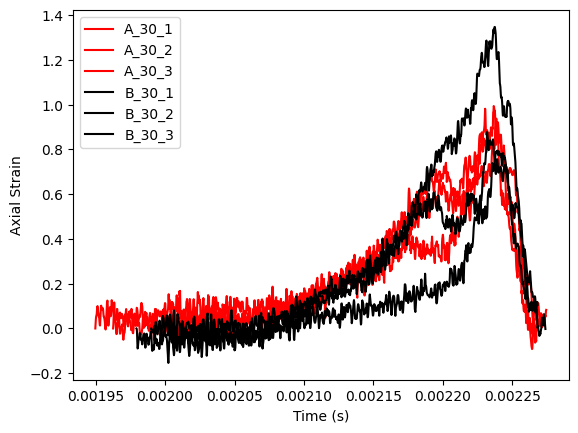

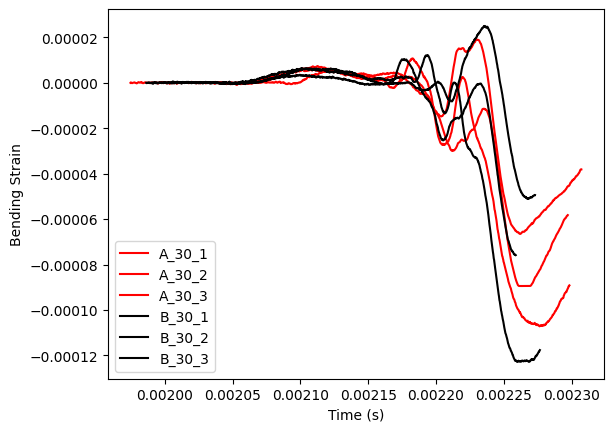

In [34]:
#Plotting

if test_vel == '25':
    plots_wanted = ['A1_25','A2_25','B1_25','B2_25']
elif test_vel == '50':
    plots_wanted = ['A3_50','A4_50','B3_50','B4_50']
elif test_vel == '100':
    plots_wanted = ['A5_100','A6_100','B5_100','B6_100']
elif test_vel == '82':
    plots_wanted = ['A_30_1','A_30_2','A_30_3','B_30_1','B_30_2','B_30_3']
elif test_vel == 'QS':
    plots_wanted = list(experiments.keys())
elif test_vel == 'ALL':
    plots_wanted = list(experiments.keys())

#For Planar 
if test_con == 'Planar' or test_con == 'Foam':
    if plot_colour == 'rk':
        #To set the colour cycles
        m=len(plots_wanted)
        is_red = range(0,m//2)
        
        for i, key in enumerate(plots_wanted):  
            if i in is_red:  
                plt.plot(experiments[key]["strain"], experiments[key]["stress"]*1e-6, label=key, color="red")
            else:
                plt.plot(experiments[key]["strain"], experiments[key]["stress"]*1e-6, label=key, color="black")
            
    elif plot_colour == 'rgb':
        for key in plots_wanted:
            plt.plot(experiments[key]["strain"], experiments[key]["stress"]*1e-6, label=key)

    
    plt.legend()
    plt.grid()
    #plt.gca().set_color_cycle(['red','black'])
    
    plt.xlabel("Strain")
    plt.ylabel("Stress (MPa)")
    #Save figure as png file
    plt.savefig(savename)

#For Angled
elif test_con == 'Angled':
    if plot_colour == 'rk':
    #To set the colour cycles
        m=len(plots_wanted)
        is_red = range(0,m//2)
        
        for i, key in enumerate(plots_wanted):  
            if i in is_red:
                plt.figure(1)
                plt.plot(experiments[key]["time_x"], experiments[key]["strain_x"], label=key, color="red")
            else:
                plt.plot(experiments[key]["time_x"], experiments[key]["strain_x"], label=key, color="black")
            plt.legend()
            plt.grid()
            plt.xlabel("Time (s)")
            plt.ylabel("Axial Strain")
            plt.savefig(savename1)
            
        for i, key in enumerate(plots_wanted): 
            if i in is_red:    
                plt.figure(2)
                plt.plot(experiments[key]["time_y"], experiments[key]["strain_y"], label=key, color="red")
            else:
                plt.plot(experiments[key]["time_y"], experiments[key]["strain_y"], label=key, color="black")
            plt.legend()
            plt.grid()
            plt.xlabel("Time (s)")
            plt.ylabel("Bending Strain")
            plt.savefig(savename2)
            
    elif plot_colour == 'rgb':
        for key in plots_wanted:
            plt.figure (1)
            plt.grid()
            plt.plot(experiments[key]["time_x"], experiments[key]["strain_x"], label=key)
            plt.legend()
            plt.xlabel("Time (s)")
            plt.ylabel("Axial Strain")
            plt.savefig(savename1)
            plt.figure (2)
            plt.grid()
            plt.plot(experiments[key]["time_y"], experiments[key]["strain_y"], label=key)
            plt.legend()
            plt.xlabel("Time (s)")
            plt.ylabel("Bending Strain")
            plt.savefig(savename2)

    #Save figure as png file
    
